In [132]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolors
import numpy as np

In [135]:
# Reading the csv files
activity = pd.read_csv('dailyActivity_merged.csv')
merged = pd.read_csv('dailyactivity_sleep_weight1.csv')

In [136]:
activity

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.970000,6.970000,0.0,1.57,0.69,4.71,0.00,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.740000,6.740000,0.0,2.44,0.40,3.91,0.00,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.280000,6.280000,0.0,2.14,1.26,2.83,0.00,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36,10,221,773,1863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
935,8877689391,5/8/2016,10686,8.110000,8.110000,0.0,1.08,0.20,6.80,0.00,17,4,245,1174,2847
936,8877689391,5/9/2016,20226,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73,19,217,1131,3710
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.00,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88,12,213,1127,3832


In [137]:
merged

,Id,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,TotalMinutesAsleep
0,1503960366,728,328,13,25,327
1,1503960366,776,217,19,21,384
2,1503960366,726,209,34,29,412
3,1503960366,773,221,10,36,340
4,1503960366,539,164,20,38,700
...,...,...,...,...,...,...
405,8792009665,749,301,20,10,343
406,8792009665,834,79,0,0,503
407,8792009665,916,101,0,0,415
408,8792009665,739,156,0,0,516


## Calories Burned vs Steps Taken in a Day

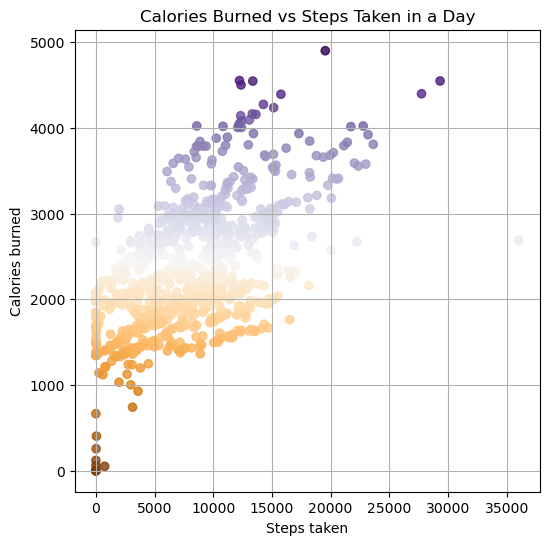

In [164]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(6,6)) # specify size of the chart
plt.scatter(activity['TotalSteps'], activity['Calories'], 
            alpha = 0.8, c = activity['Calories'], cmap = 'PuOr')

plt.xlabel("Steps taken")
plt.ylabel("Calories burned")
plt.title("Calories Burned vs Steps Taken in a Day")
plt.grid(True)
plt.show()

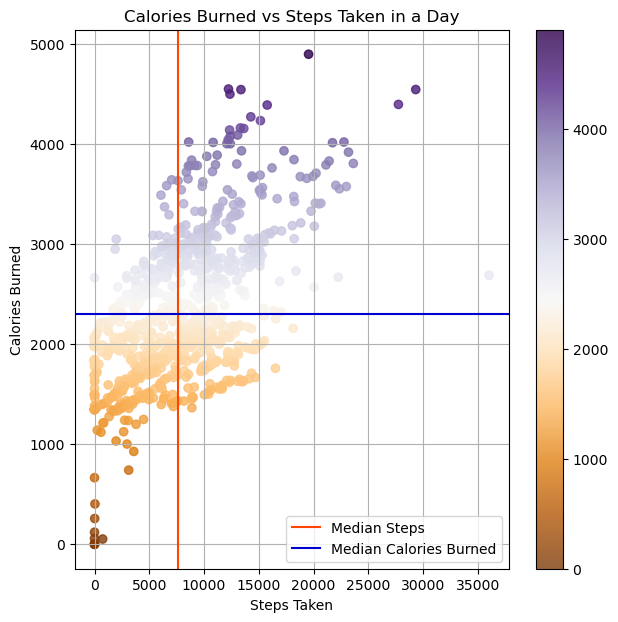

In [165]:
# plotting scatter plot
plt.style.use("default")
plt.figure(figsize=(7,7)) # specify size of the chart
plt.scatter(activity['TotalSteps'], activity['Calories'], 
            alpha = 0.8, c = activity['Calories'], cmap = 'PuOr')

median_calories = 2303
median_steps = 7637
plt.colorbar(orientation = "vertical")
plt.axvline(median_steps, color = "orangered", label = "Median Steps")
plt.axhline(median_calories, color = "mediumblue", label = "Median Calories Burned")
plt.xlabel("Steps Taken")
plt.ylabel("Calories Burned")
plt.title("Calories Burned vs Steps Taken in a Day")
plt.grid(True)
plt.legend()
plt.show()

## Activity Level and Total Sleeping Time 

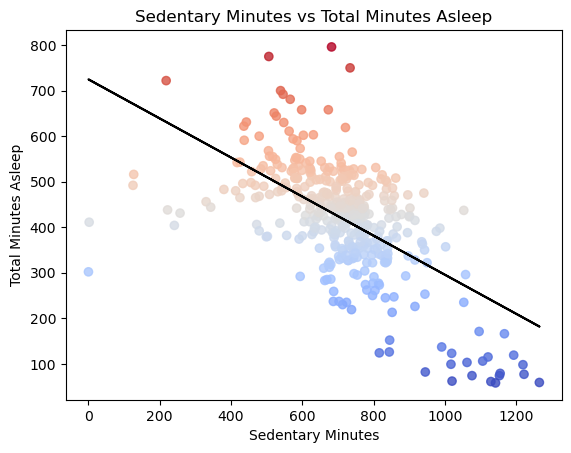

In [177]:
# sedentary minutes vs total minutes asleep
plt.scatter(merged['SedentaryMinutes'], merged['TotalMinutesAsleep'], 
            alpha = 0.8, c = merged['TotalMinutesAsleep'], cmap = 'coolwarm')
plt.xlabel("Sedentary Minutes")
plt.ylabel("Total Minutes Asleep")
plt.title("Sedentary Minutes vs Total Minutes Asleep")

x = merged['SedentaryMinutes']
y = merged['TotalMinutesAsleep']
m, b = np.polyfit(x, y, 1)
#add linear regression line in black to scatterplot 
plt.plot(x, m*x+b, color = 'black')

plt.show()

In [141]:
#finding the correlation coeff
x = merged['SedentaryMinutes']
y = merged['TotalMinutesAsleep']
np.corrcoef(x, y)[0][1]

-0.6010731396971011

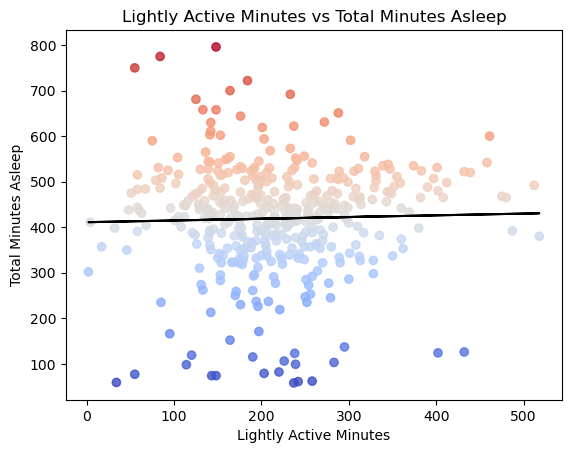

In [173]:
# lightly active minutes vs total minutes asleep
plt.scatter(merged['LightlyActiveMinutes'], merged['TotalMinutesAsleep'], 
            alpha = 0.8, c = merged['TotalMinutesAsleep'], cmap = 'coolwarm')
plt.xlabel("Lightly Active Minutes")
plt.ylabel("Total Minutes Asleep")
plt.title("Lightly Active Minutes vs Total Minutes Asleep")

x = merged['LightlyActiveMinutes']
y = merged['TotalMinutesAsleep']
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
plt.plot(x, m*x+b, color = 'black')

plt.show()

In [143]:
#finding the correlation coeff
x = merged['LightlyActiveMinutes']
y = merged['TotalMinutesAsleep']
np.corrcoef(x, y)[0][1]

0.027583356789564462

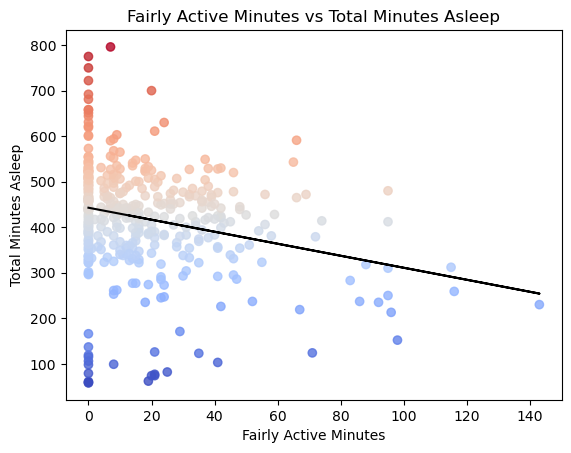

In [174]:
#fairly active minutes vs total minutes of sleep scatterplot
plt.scatter(merged['FairlyActiveMinutes'], merged['TotalMinutesAsleep'], 
            alpha = 0.8, c = merged['TotalMinutesAsleep'], cmap = 'coolwarm')
plt.xlabel("Fairly Active Minutes")
plt.ylabel("Total Minutes Asleep")
plt.title("Fairly Active Minutes vs Total Minutes Asleep")

x = merged['FairlyActiveMinutes']
y = merged['TotalMinutesAsleep']
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
plt.plot(x, m*x+b, color = 'black')

plt.show()

In [145]:
#finding the correlation coeff
x = merged['FairlyActiveMinutes']
y = merged['TotalMinutesAsleep']
np.corrcoef(x, y)[0][1]

-0.2492079302480945

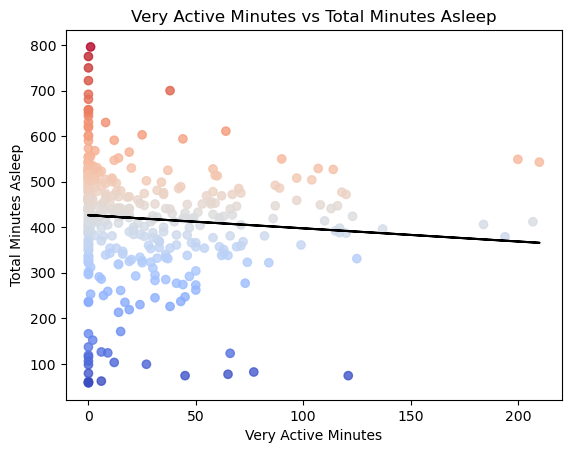

In [175]:
# very active minutes vs total minutes asleep
plt.scatter(merged['VeryActiveMinutes'], merged['TotalMinutesAsleep'], 
            alpha = 0.8, c = merged['TotalMinutesAsleep'], cmap = 'coolwarm')
plt.xlabel("Very Active Minutes")
plt.ylabel("Total Minutes Asleep")
plt.title("Very Active Minutes vs Total Minutes Asleep")

x = merged['VeryActiveMinutes']
y = merged['TotalMinutesAsleep']
m, b = np.polyfit(x, y, 1)
#add linear regression line to scatterplot 
plt.plot(x, m*x+b, color = 'black')

plt.show()

In [147]:
#finding the correlation coeff
x = merged['VeryActiveMinutes']
y = merged['TotalMinutesAsleep']
np.corrcoef(x, y)[0][1]

-0.08812657953070487

## Level of Activity Breakdown

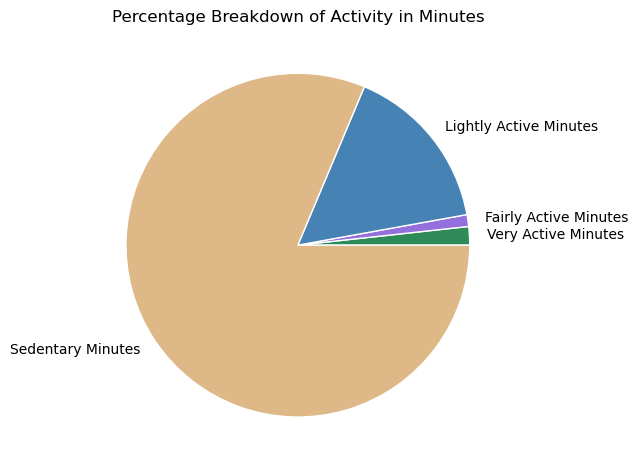

In [193]:
# calculating total of individual minutes column
very_active_mins = activity["VeryActiveMinutes"].sum()
fairly_active_mins = activity["FairlyActiveMinutes"].sum()
lightly_active_mins = activity["LightlyActiveMinutes"].sum()
sedentary_mins = activity["SedentaryMinutes"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Sedentary Minutes"]

plt.style.use("default")
plt.pie(slices, labels = labels, 
        colors = ["seagreen", "mediumpurple", "steelblue", "burlywood"], wedgeprops = {"edgecolor": "white"})
plt.title("Percentage Breakdown of Activity in Minutes")
plt.tight_layout()
plt.show()

In [186]:
# To use different colors for creating graphs 
def plot_colortable(colors, sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

In [ ]:
# show the colors available
plot_colortable(mcolors.CSS4_COLORS)
plt.show()